In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
preprocessed = pd.read_csv('preprocessed_house_pricing.csv')

In [3]:
preprocessed

,Area,BHK,Bathroom,Parking,Price,Furnishing_Semi-Furnished,Furnishing_Unfurnished,District_ East Delhi,District_ North West Delhi,District_ Shahdara,District_ South Delhi,District_ South East Delhi,District_ West Delhi,District_South West Delhi,Status_Ready_to_move,Transaction_Resale,Type_Builder_Floor
0,345.0,1.0,1.0,1.0,5500000.0,1,0,0,0,0,0,0,0,0,1,1,1
1,468.0,2.0,2.0,1.0,4100000.0,0,1,0,0,0,0,0,0,0,1,1,1
2,530.0,4.0,1.0,1.0,6800000.0,1,0,0,0,0,0,0,0,0,1,1,0
3,535.0,2.0,1.0,1.0,3900000.0,0,0,0,0,0,0,0,0,0,1,0,0
4,576.0,2.0,2.0,1.0,5000000.0,0,1,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,4000.0,4.0,4.0,1.0,72500000.0,1,0,0,0,0,0,0,0,1,1,1,1
1190,4150.0,4.0,4.0,3.0,82500000.0,0,1,0,0,0,0,0,0,1,1,0,1
1191,4200.0,4.0,5.0,3.0,74000000.0,1,0,0,0,0,0,0,0,1,1,0,1
1192,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df = preprocessed.copy()

In [5]:
df.columns.values

array(['Area', 'BHK', 'Bathroom', 'Parking', 'Price',
       'Furnishing_Semi-Furnished', 'Furnishing_Unfurnished',
       'District_ East Delhi', 'District_ North West Delhi',
       'District_ Shahdara', 'District_ South Delhi',
       'District_ South East Delhi', 'District_ West Delhi',
       'District_South West Delhi ', 'Status_Ready_to_move',
       'Transaction_Resale', 'Type_Builder_Floor'], dtype=object)

In [6]:
reorder = ['Area', 'BHK', 'Bathroom', 'Parking',
       'Furnishing_Semi-Furnished', 'Furnishing_Unfurnished',
       'District_ East Delhi', 'District_ North West Delhi',
       'District_ Shahdara', 'District_ South Delhi',
       'District_ South East Delhi', 'District_ West Delhi',
       'District_South West Delhi ', 'Status_Ready_to_move',
       'Transaction_Resale', 'Type_Builder_Floor', 'Price']

In [7]:
df = df[reorder]

In [8]:
df = df.dropna(axis = 0)

## splitting

In [9]:
inputs = df.iloc[:,:16]
targets = df.iloc[:,-1:]

In [10]:
train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs, targets, random_state = 20, test_size = 0.2)

## standardize

In [11]:
scale = StandardScaler()
scale.fit(train_inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_train_inputs = scale.transform(train_inputs)

## model

In [13]:
train_targets = train_targets.to_numpy()

In [14]:
test_targets = test_targets.to_numpy()

In [15]:
reg = LinearRegression()
reg.fit(scaled_train_inputs,train_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
reg.coef_

array([[11727113.55642096, -1061079.18237534,  5128588.29712621,
          734539.96294961,  -259622.52304298,  -218856.43989291,
          201959.89064766, -1011000.23080582,   168466.71566325,
         1068881.0854508 ,  -205117.81643391,   720415.10693511,
         -342520.32163112, -1614576.69235475, -1346473.55209774,
          201625.91363609]])

In [17]:
reg.score(scaled_train_inputs,train_targets)

0.7249946472203797

In [18]:
reg.intercept_

array([19045141.65792235])

In [19]:
summary_table = pd.DataFrame( columns = ['features','weights'])

In [20]:
summary_table['features'] =np.transpose(inputs.columns.values)

In [21]:
summary_table['weights'] = np.transpose(reg.coef_).round(2)

In [22]:
summary_table

,features,weights
0,Area,11727113.56
1,BHK,-1061079.18
2,Bathroom,5128588.30
3,Parking,734539.96
4,Furnishing_Semi-Furnished,-259622.52
5,Furnishing_Unfurnished,-218856.44
6,District_ East Delhi,201959.89
7,District_ North West Delhi,-1011000.23
8,District_ Shahdara,168466.72
9,District_ South Delhi,1068881.09


## test

In [23]:
scale.fit(test_inputs)
scaled_test_inputs = scale.transform(test_inputs)

In [24]:
pred = reg.predict(scaled_test_inputs)
pred

array([[25619241.76952271],
       [ 2024397.39456937],
       [17039207.71155183],
       [20148918.76136256],
       [12075904.89588428],
       [23190809.88716398],
       [ 9480794.04653396],
       [23661462.50623059],
       [-6096735.65963667],
       [41392719.03990211],
       [ 7700672.91904206],
       [24432555.7390586 ],
       [26450605.7603315 ],
       [ 9790397.23911533],
       [ 7595262.21318399],
       [19843659.51027566],
       [ 3714499.89184551],
       [-4531517.13054177],
       [10998854.14965073],
       [ 9480794.04653396],
       [15468387.07014173],
       [13336260.21067404],
       [21804563.89042896],
       [12425780.8401579 ],
       [ 1046325.77307343],
       [13431826.9029158 ],
       [16465995.40689966],
       [22484893.04812346],
       [ 9018894.74531539],
       [ 5324126.84504857],
       [16705341.96417621],
       [ 9187189.26228024],
       [38035248.84955863],
       [-3265600.16672852],
       [-2848099.2624834 ],
       [ 7055120.966

In [25]:
test_targets 

array([[1.950e+07],
       [4.500e+06],
       [1.200e+07],
       [1.750e+07],
       [1.000e+07],
       [2.200e+07],
       [2.800e+06],
       [2.250e+07],
       [1.800e+06],
       [5.250e+07],
       [4.800e+06],
       [2.700e+07],
       [2.000e+07],
       [8.000e+06],
       [3.800e+06],
       [1.150e+07],
       [2.700e+06],
       [6.000e+06],
       [1.100e+07],
       [9.000e+06],
       [1.100e+07],
       [6.800e+06],
       [1.420e+07],
       [1.550e+07],
       [1.700e+06],
       [5.000e+06],
       [1.700e+07],
       [1.900e+07],
       [6.500e+06],
       [3.800e+06],
       [1.500e+07],
       [1.150e+07],
       [3.150e+07],
       [1.500e+06],
       [2.200e+06],
       [4.500e+06],
       [1.600e+07],
       [1.700e+06],
       [1.080e+07],
       [1.600e+07],
       [4.100e+07],
       [5.250e+07],
       [6.500e+07],
       [9.300e+07],
       [1.350e+07],
       [8.000e+06],
       [1.550e+07],
       [2.900e+07],
       [1.650e+07],
       [4.750e+07],


In [26]:
import matplotlib.pyplot as plt

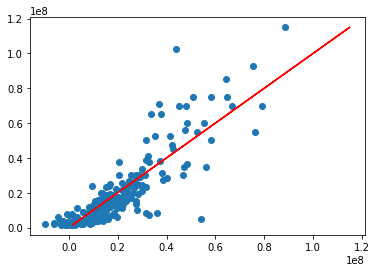

In [27]:
plt.scatter(reg.predict(scaled_test_inputs), test_targets)
# Perfect predictions
plt.plot(test_targets,test_targets,'r')

In [28]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [29]:
sqrt(mse(test_targets,pred))

9951956.6453372

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [31]:
explained_variance_score(test_targets,pred)

0.7442693253557146